# Data Story
The purpose of this jupyter notebook is to analyze and visualize the distrubution of the features in the movie database and their correlation towards the box office features. By analizing these trends, I hope to make insights that will ultimately improve my model

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('../../movie_metadata_final.csv')


In [132]:
df=df.dropna()
df=df.drop('Unnamed: 0',axis=1)

In [133]:
list_df=list(df)

In [134]:
list_df

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

The first aspect that I will analyze is the correlation between features that are charathcteruzed by ints or floats with the gross movie budget

In [135]:
list_remove=[]
for items in list_df:
    if isinstance(df[items][0],str):
        list_remove.append(items)
for items in list_remove:
    list_df.remove(items)

In [136]:
list_df

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

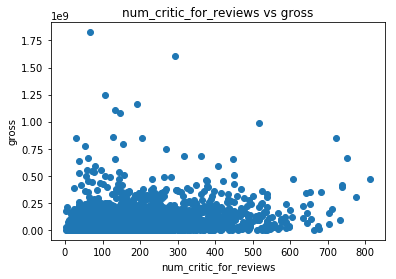

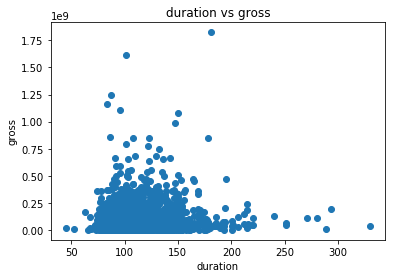

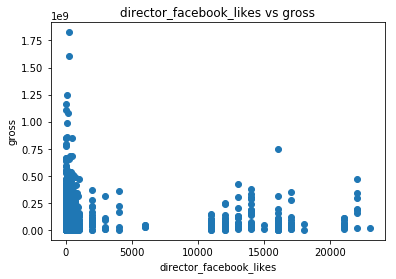

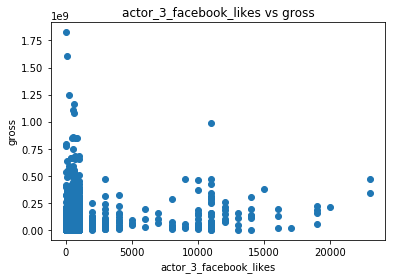

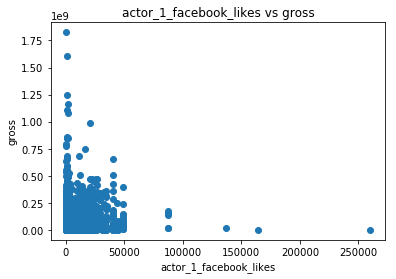

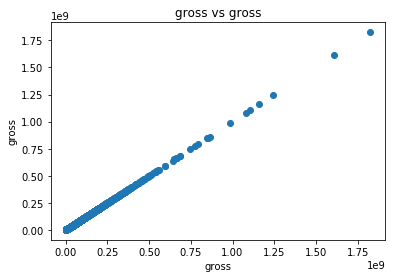

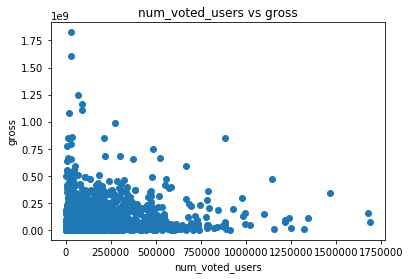

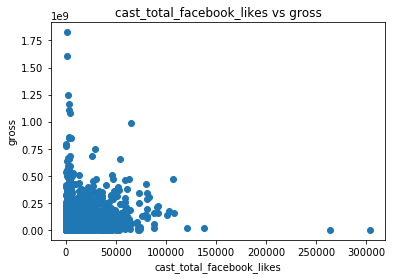

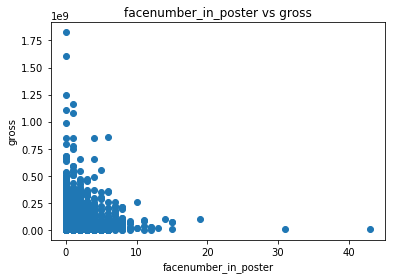

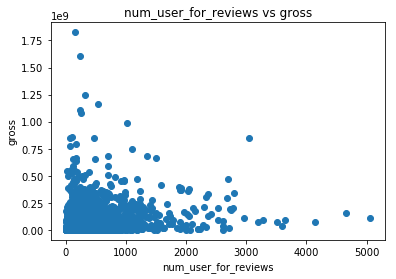

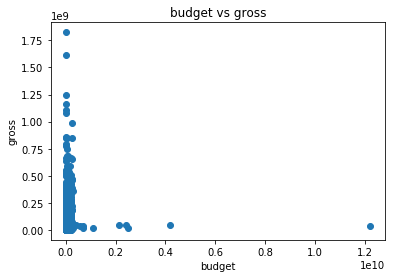

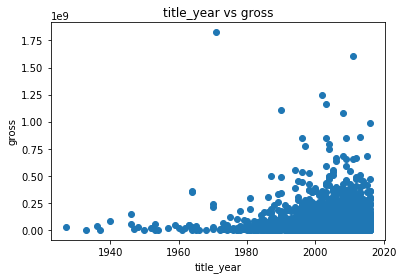

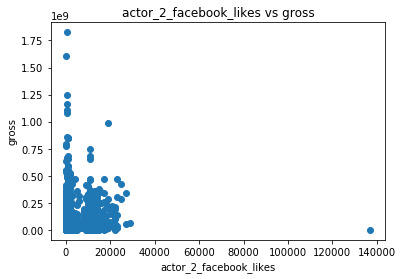

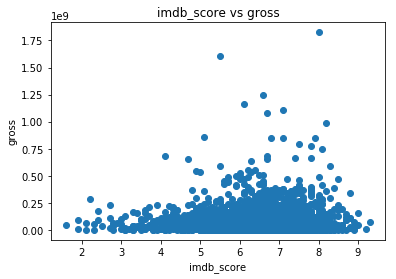

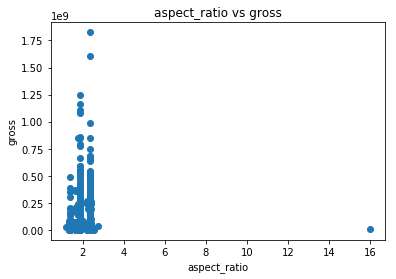

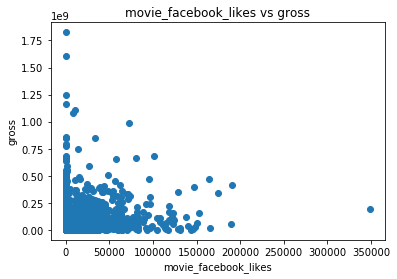

In [137]:
for items in list_df:
    plt.xlabel(items)
    plt.ylabel('gross')
    plt.title(items+' vs gross')
    plt.scatter(df[items],df['gross'])
    plt.show()


The scatter plots between gross and the other aspects dont seem to have any correlation.

In [138]:
for items in list_df:
    print df['gross'].corr(df[items]),items

0.202717671159 num_critic_for_reviews
0.129132934627 duration
0.0421578400201 director_facebook_likes
0.125411229175 actor_3_facebook_likes
0.0613420216908 actor_1_facebook_likes
1.0 gross
0.154706165501 num_voted_users
0.0999766356069 cast_total_facebook_likes
-0.0322595147135 facenumber_in_poster
0.164126652579 num_user_for_reviews
0.0514327546564 budget
0.080366330784 title_year
0.0895970836375 actor_2_facebook_likes
0.0370255372179 imdb_score
0.0366750774622 aspect_ratio
0.123304742897 movie_facebook_likes


As verified the features  have little to no correlation with gross. Working with the log of gross may give better results, also working with the log of budget might also help getting a better correlation between gross and budget

In [139]:
df['budget']=np.log10(df['budget'])
df['gross']=np.log10(df['gross'])

In [140]:
final_list=[]
final_list1=[]
for items in list_df:
    final_list.append(df['gross'].corr(df[items]))
    final_list1.append(items)
    print df['gross'].corr(df[items]),items
final_dict={'features':final_list1,'corr':final_list}

0.190237374542 num_critic_for_reviews
0.144038114544 duration
0.0605757471765 director_facebook_likes
0.109746725982 actor_3_facebook_likes
0.0864786279447 actor_1_facebook_likes
1.0 gross
0.147088939666 num_voted_users
0.117910289009 cast_total_facebook_likes
-0.0120260126319 facenumber_in_poster
0.15613985281 num_user_for_reviews
0.443081368364 budget
0.0929561083691 title_year
0.105205570144 actor_2_facebook_likes
-0.0121375638653 imdb_score
0.0718846813493 aspect_ratio
0.101895410559 movie_facebook_likes


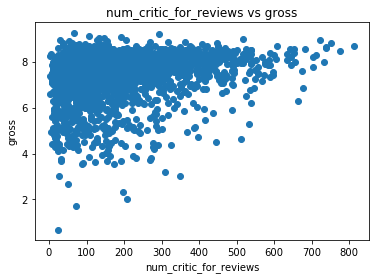

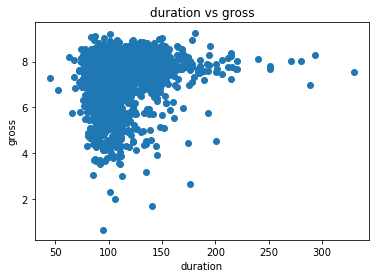

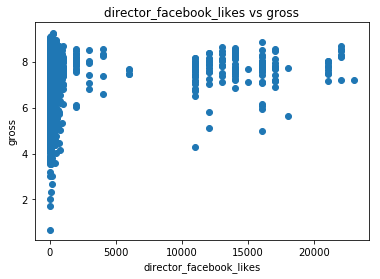

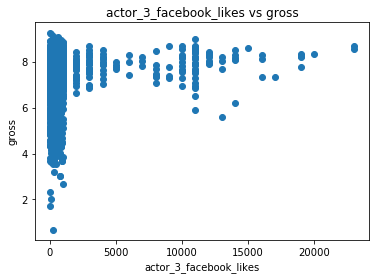

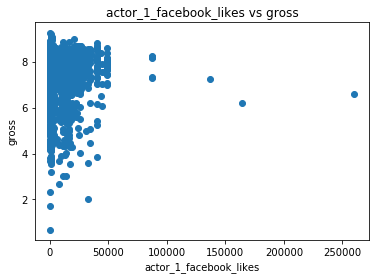

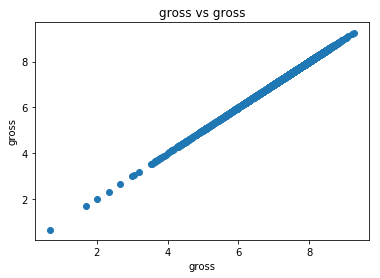

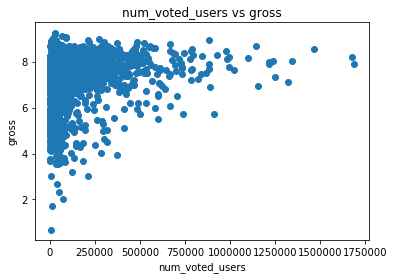

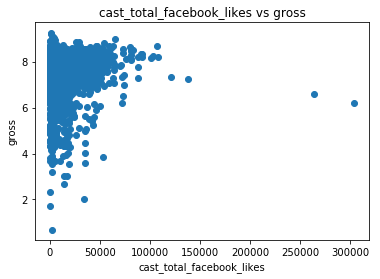

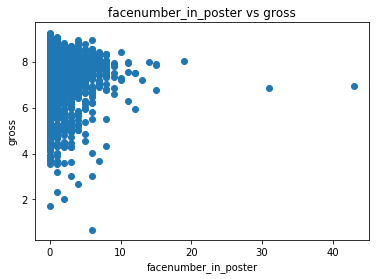

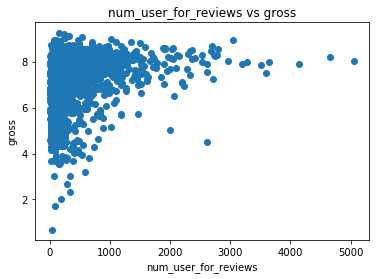

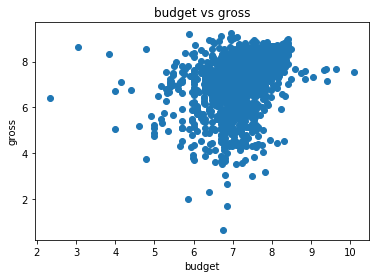

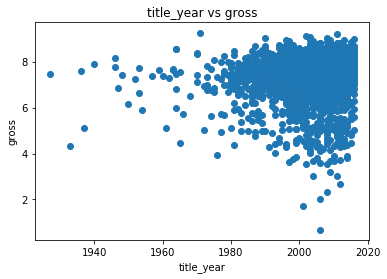

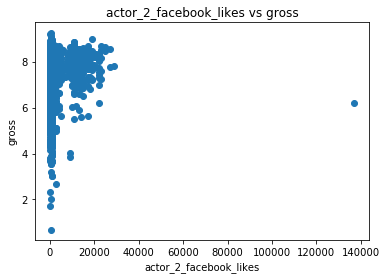

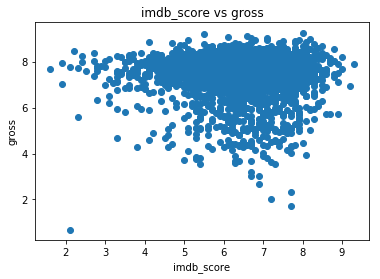

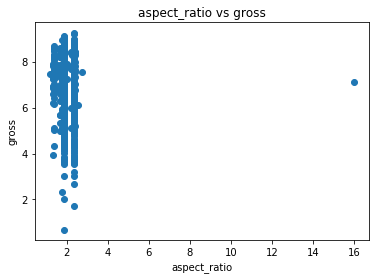

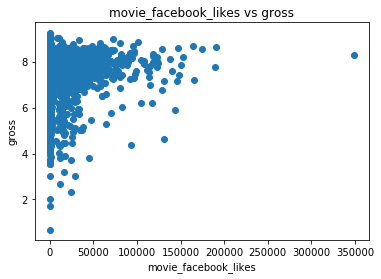

In [141]:
for items in list_df:
    plt.xlabel(items)
    plt.ylabel('gross')
    plt.title(items+' vs gross')
    plt.scatter(df[items],df['gross'])
    plt.show()


## Results:
From the data I've wrangled I have been to construct a number of different scatter plots and understood their correlation to the feature I am interested in predicting ("gross").The correlations improved significantly by using the log of gross and the log of budget rather than just their initial values.
Here are the values sorted by their correlation to gross

In [157]:
df_corr=pd.DataFrame(final_dict)
df_corr=df_corr.sort_values('corr',ascending=False)
df_corr=df_corr.drop(df_corr.index[0])
df_corr

,corr,features
10,0.443081,budget
0,0.190237,num_critic_for_reviews
9,0.156140,num_user_for_reviews
6,0.147089,num_voted_users
1,0.144038,duration
7,0.117910,cast_total_facebook_likes
3,0.109747,actor_3_facebook_likes
12,0.105206,actor_2_facebook_likes
15,0.101895,movie_facebook_likes
11,0.092956,title_year


Note that I did not do data analysis on features with strings, I will do so later on the machine learning section by turning strings into vectors 